<a href="https://colab.research.google.com/github/Ganeshprasannamax/Task_3/blob/main/Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Takehome_user_engagement

In [1]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
#import csv files

user= pd.read_csv('takehome_users.csv', encoding='latin-1')
engage= pd.read_csv('takehome_user_engagement.csv', index_col='time_stamp', parse_dates=True)

In [5]:
user.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [6]:
engage.head()

,user_id,visited
time_stamp,,
2014-04-22 03:53:30,1,1
2013-11-15 03:45:04,2,1
2013-11-29 03:45:04,2,1
2013-12-09 03:45:04,2,1
2013-12-25 03:45:04,2,1


In [7]:
engage_aggre = engage.groupby('user_id').resample('1w').sum()

In [8]:
aggre_clean = engage_aggre[engage_aggre['user_id'].isnull()==False].drop('user_id',axis=1)
aggre_clean.head(10)

visited
user_id time_stamp         
1       2014-04-27        1
2       2013-11-17        1
        2013-11-24        0
        2013-12-01        1
        2013-12-08        0
        2013-12-15        1
        2013-12-22        0
        2013-12-29        1
        2014-01-05        1
        2014-01-12        1

In [9]:
active = aggre_clean['visited']>=3

In [10]:
active = active.groupby(level=0).apply(np.sum)

In [11]:
active = active[active!=0]
active_users = pd.DataFrame(active,index=active.index)
active_users.columns = ['Active Weeks']
active_users.head()

,Active Weeks
user_id,
2,1
10,52
20,1
33,1
42,68


In [12]:
user_data = active_users.merge(user,left_index=True,right_on='object_id',how='inner')

user_data['Active'] = 1


In [13]:
user['Active'] = int(0)
user.iloc[list(user_data.index),10] = 1
user_model = user.set_index('object_id').sort_index()

In [14]:
user_model = user_model.drop(['name','email','last_session_creation_time'],axis=1)
data_feature = user_model.pop('creation_time')
user_model.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,Active
object_id,,,,,,
1,GUEST_INVITE,1,0,11,10803.0,0
2,ORG_INVITE,0,0,1,316.0,1
3,ORG_INVITE,0,0,94,1525.0,0
4,GUEST_INVITE,0,0,1,5151.0,0
5,GUEST_INVITE,0,0,193,5240.0,0


In [15]:
user_model['invited_by_user_id'] = user_model['invited_by_user_id'].fillna(0)
user_model['invited_by_user_id'] = user_model['invited_by_user_id'].apply(lambda x:1 if x!=0 else 0)

user_model = pd.get_dummies(data=user_model,columns=['creation_source'])

In [16]:
org = user_model.groupby('org_id').sum()

org_cata = []
for i in user_model['org_id']:
    cata = org.loc[i,'Active']
    org_cata.append(cata)
user_model['org_id'] = org_cata

user_model = pd.get_dummies(data=user_model,columns=['org_id'])
user_model.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,invited_by_user_id,Active,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,org_id_0,...,org_id_6,org_id_7,org_id_8,org_id_9,org_id_10,org_id_11,org_id_12,org_id_13,org_id_14,org_id_16
object_id,,,,,,,,,,,,,,,,,,,,,
1,1,0,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
#We have 12000 observations and 25 columns

user_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 1 to 12000
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   opted_in_to_mailing_list            12000 non-null  int64
 1   enabled_for_marketing_drip          12000 non-null  int64
 2   invited_by_user_id                  12000 non-null  int64
 3   Active                              12000 non-null  int64
 4   creation_source_GUEST_INVITE        12000 non-null  uint8
 5   creation_source_ORG_INVITE          12000 non-null  uint8
 6   creation_source_PERSONAL_PROJECTS   12000 non-null  uint8
 7   creation_source_SIGNUP              12000 non-null  uint8
 8   creation_source_SIGNUP_GOOGLE_AUTH  12000 non-null  uint8
 9   org_id_0                            12000 non-null  uint8
 10  org_id_1                            12000 non-null  uint8
 11  org_id_2                            12000 non-null  uint8
 12  org_

Active                                1.000000
org_id_5                              0.059582
org_id_6                              0.057128
creation_source_GUEST_INVITE          0.043657
org_id_12                             0.032859
creation_source_SIGNUP_GOOGLE_AUTH    0.031432
invited_by_user_id                    0.022735
org_id_7                              0.021869
org_id_4                              0.016279
creation_source_SIGNUP                0.016004
opted_in_to_mailing_list              0.010339
org_id_3                              0.007948
org_id_8                              0.007735
org_id_10                             0.007492
enabled_for_marketing_drip            0.005901
org_id_16                             0.004317
org_id_9                              0.002004
creation_source_ORG_INVITE           -0.011376
org_id_13                            -0.019385
org_id_2                             -0.023874
org_id_14                            -0.026086
org_id_11    

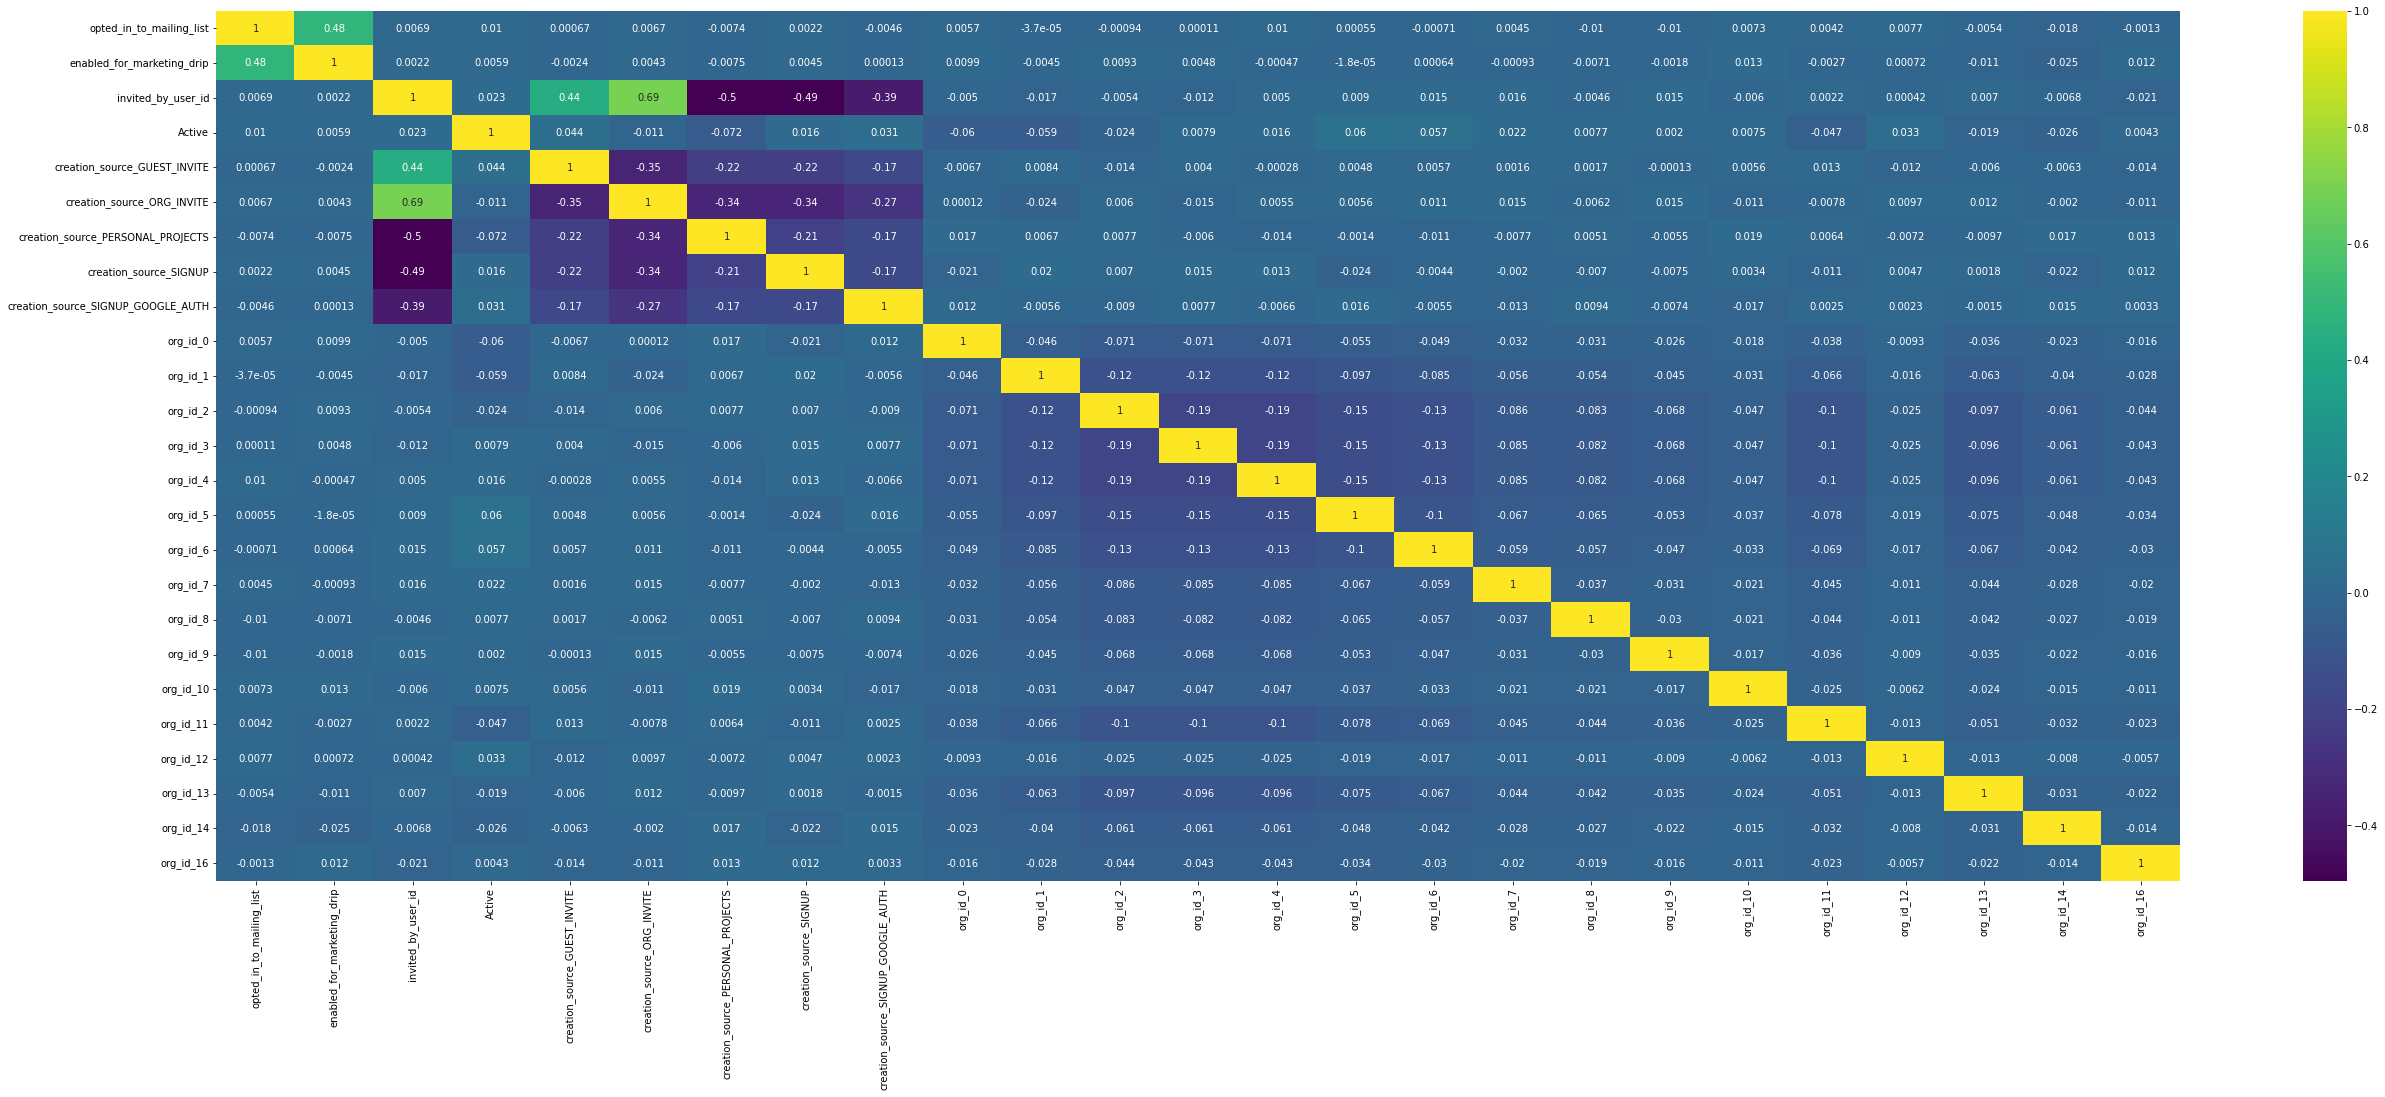

In [18]:
#  Check correlation 

plt.figure(figsize=(44,16))
cm=user_model.corr()

sns.heatmap(cm, annot=True, cmap='viridis')
cm['Active'].sort_values(ascending=False)


In [19]:
from sklearn.model_selection import train_test_split

user_model=user_model.astype('int')
y = user_model['Active']
X = user_model.drop('Active', axis=1)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((8400, 24), (3600, 24), (8400,), (3600,))

# Gradient Boosting Classifier

In [21]:
# import the necessary machine learning tools

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [22]:
# Instantiate model

gbc = GradientBoostingClassifier(max_features='sqrt', random_state=37)



In [23]:
# Specify the hyperparameter to be tunned
parameters = {'n_estimators':[40,45,50,55,60],'learning_rate':[.01,0.02,0.03,0.04,0.05],'max_depth':[1,2,3,4,5]}
import time 
start = time.time()
gbc_cv = GridSearchCV(gbc, param_grid=parameters, cv=5)
gbc_cv.fit(X_train, y_train)
gbc_pred = gbc_cv.predict(X_test)           
end = time.time()

In [24]:
print('accuracy_score:', accuracy_score(y_test, gbc_pred))    
gbc_prob = gbc_cv.predict_proba(X_test)
print('Log Loss: ', log_loss(y_test, gbc_prob))
print('confusion_matrix: \n', confusion_matrix(y_test, gbc_pred))
print('classification report: \n', classification_report(y_test, gbc_pred))
print("Tuned Model Parameters: {}".format(gbc_cv.best_params_))

accuracy_score: 0.8833333333333333
Log Loss:  0.359305979037032
confusion_matrix: 
 [[3180    0]
 [ 420    0]]
classification report: 
               precision    recall  f1-score   support

           0       0.88      1.00      0.94      3180
           1       0.00      0.00      0.00       420

    accuracy                           0.88      3600
   macro avg       0.44      0.50      0.47      3600
weighted avg       0.78      0.88      0.83      3600

Tuned Model Parameters: {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 40}


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# RandomForestClassifier

In [28]:
# Instantiate model
import time 
start = time.time()
rfc = RandomForestClassifier()
param = {'n_estimators' : [40, 50, 100, 150, 200, 250, 300, 500, 1000],'max_depth': [8, 10, 12, 14, 16, 18, 20]}
rfc_cv = GridSearchCV(rfc, param_grid=param, cv=5)
rfc_cv.fit(X_train, y_train)
rfc_pred = rfc_cv.predict(X_test)
end = time.time()


In [29]:
print('accuracy_score:', accuracy_score(y_test, rfc_pred))
rfc_proba = rfc_cv.predict_proba(X_test)
print('Log Loss: ', log_loss(y_test, rfc_proba))
print('confusion_matrix: \n', confusion_matrix(y_test, rfc_pred))
print('classification report: \n', classification_report(y_test, rfc_pred))
print("Tuned Model Parameters: {}".format(rfc_cv.best_params_))


accuracy_score: 0.8833333333333333
Log Loss:  0.3520014815265948
confusion_matrix: 
 [[3180    0]
 [ 420    0]]
classification report: 
               precision    recall  f1-score   support

           0       0.88      1.00      0.94      3180
           1       0.00      0.00      0.00       420

    accuracy                           0.88      3600
   macro avg       0.44      0.50      0.47      3600
weighted avg       0.78      0.88      0.83      3600

Tuned Model Parameters: {'max_depth': 8, 'n_estimators': 40}


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
# Rerun the gradient boosting algorithm using the optimized hyper parameters
import time 
start= time.time()
GBC = GradientBoostingClassifier(max_features='sqrt', random_state=42, n_estimators=55, learning_rate=0.04, max_depth= 4) 
GBC.fit(X_train, y_train)
y_pred_GBC= GBC.predict(X_test)
GBC_prob0 =GBC.predict_proba(X_test)
gradb_logloss0 = log_loss(y_test, GBC_prob0)
end = time.time()

In [31]:
print('accuracy_score:', accuracy_score(y_test, y_pred_GBC))
print(' Log Loss for the Gradient Boosting Classifier: ', gradb_logloss0)
print('confusion_matrix \n:', classification_report(y_test, y_pred_GBC))

accuracy_score: 0.8833333333333333
 Log Loss for the Gradient Boosting Classifier:  0.35188368465007935
confusion_matrix 
:               precision    recall  f1-score   support

           0       0.88      1.00      0.94      3180
           1       0.00      0.00      0.00       420

    accuracy                           0.88      3600
   macro avg       0.44      0.50      0.47      3600
weighted avg       0.78      0.88      0.83      3600



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
for name, importance in zip(X_train.columns, GBC.feature_importances_):
 print(name, "=", importance)

opted_in_to_mailing_list = 0.026835673055953066
enabled_for_marketing_drip = 0.030147943375595974
invited_by_user_id = 0.013139093872685503
creation_source_GUEST_INVITE = 0.05094570929501185
creation_source_ORG_INVITE = 0.015154895759643613
creation_source_PERSONAL_PROJECTS = 0.17027224992468085
creation_source_SIGNUP = 0.022628459048512257
creation_source_SIGNUP_GOOGLE_AUTH = 0.0201223792359872
org_id_0 = 0.12403679359165082
org_id_1 = 0.14783581586411645
org_id_2 = 0.01631922045629172
org_id_3 = 0.001922825285951877
org_id_4 = 0.010721844857864026
org_id_5 = 0.07461757779584607
org_id_6 = 0.10348151167908594
org_id_7 = 0.02103780606355838
org_id_8 = 0.005780423296466499
org_id_9 = 0.0002702585359717666
org_id_10 = 0.006214539441446983
org_id_11 = 0.09611321721853089
org_id_12 = 0.01110850971710424
org_id_13 = 0.002035232496801215
org_id_14 = 0.028670089150049954
org_id_16 = 0.0005879309811929488


# Visualizing Feature Importances using Gradient Boosting Algorithm

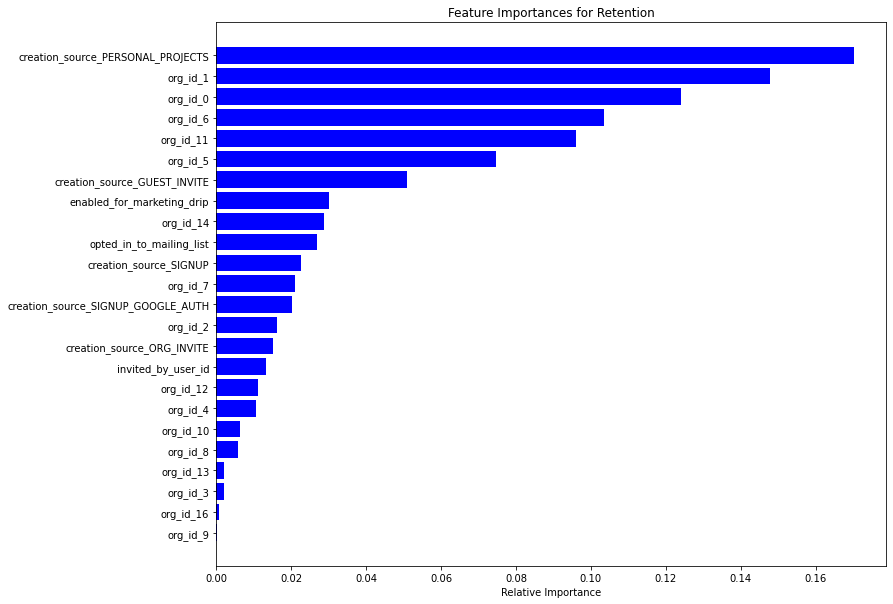

In [35]:
features = X_train.columns
importances = GBC.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 10))
plt.title('Feature Importances for Retention')
plt.barh(range(len(indices)),importances[indices],color='b',align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()